In [81]:
import scipy.sparse as sps
import scipy.sparse.linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import collections  as mc
import seaborn as sns
import pandas as pd
style.use('ggplot')

In [110]:
def laplacian_fd(h):
    """Laplacian on a 2x2 square, with neumann 
       boundary conditions f'(x) = 0 on boundary"""
    N = int(2/h) + 1
    
    # Vector of x values
    x = np.tile(np.linspace(-1, 1, N), N)
    
    # Vector of y values
    y = np.repeat(np.linspace(-1, 1, N), N)
    
    # Build LHS
    main = -4*np.ones(N**2)
    side = np.ones(N**2-1)
    side[np.arange(1,N**2)%N==0] = 0
    side[np.arange(0,N**2 - 1)%N==0] = 2
    up_down = np.ones(N**2-N)
    up_down[np.arange(0, N)] = 2
    diagonals = [main, np.flip(side), side, np.flip(up_down), up_down]
    laplacian = sparse.diags(diagonals, [0, -1, 1, -N, N], format="csr")
    
    # Build RHS
    rhs = -np.cos(np.pi*x)*np.sin(np.pi*y)
    
    return x, y, sps.linalg.spsolve((1/h**2)*laplacian, rhs)

In [111]:
def plot_heatmap(x, y, sol):
    data = {'x': x, 'y': y, 'solution': sol}
    df = pd.DataFrame(data=data)
    pivot = df.pivot(index='y', columns='x', values='solution')
    ax = sns.heatmap(pivot)
    ax.invert_yaxis()

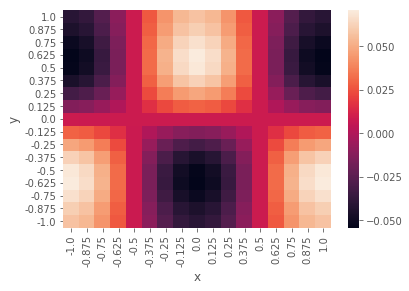

In [112]:
x, y, solution = laplacian_fd(.125)
plot_heatmap(x, y, solution)